In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('US counties - education vs per capita personal income - results-20221227-213216.csv')

In [4]:
counties=geopandas.read_file(r"C:\Users\berid\python\geopandas\tl_2018_us_county\tl_2018_us_county.shp")

In [5]:
states=geopandas.read_file(r"C:\Users\berid\python\geopandas\s_22mr22_states\s_22mr22.shp")

In [6]:
population=pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population')[0]
population.columns=[i[-1] for i in population.columns]
population=population[['State or territory','April 1, 2020']]

In [7]:
iso=pd.read_html('https://en.wikipedia.org/wiki/ISO_3166-2:US')[0]
iso['Code']=iso['Code'].str.split('-').str[1]
iso=iso.merge(population,left_on='Subdivision name (en)',right_on='State or territory')

In [8]:
grouped=df.groupby('state').agg({'bachelor_degree_numbers_2016_2020':'sum','per_capita_personal_income_2019':'mean'}).reset_index()
grouped=grouped.merge(iso[['Code','April 1, 2020']],left_on='state',right_on='Code').merge(states[['STATE','geometry']],left_on='state',right_on='STATE')
grouped=geopandas.GeoDataFrame(grouped)

grouped['education_percentage']=(100*grouped['bachelor_degree_numbers_2016_2020']/grouped['April 1, 2020'])
grouped['lon']=grouped['geometry'].centroid.x.astype(float)
grouped['lat']=grouped['geometry'].centroid.y.astype(float)

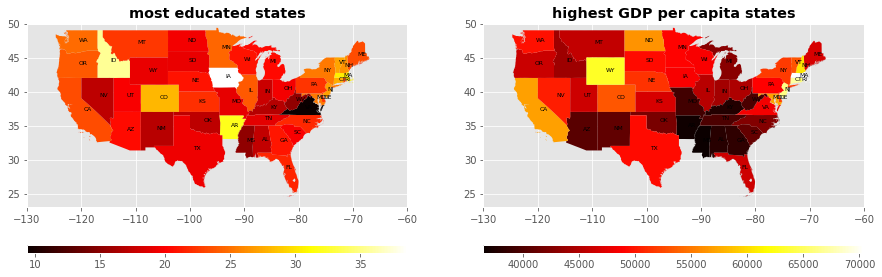

   state  education_percentage
11    IA             38.608637
12    ID             35.478107
2     AR             31.989385
17    MA             30.500246
5     CO             28.107610
6     CT             27.621061
44    VT             27.263920
29    NJ             27.054189
28    NH             26.473853
18    MD             25.329549
32    NY             25.309287
45    WA             24.752348
21    MN             24.508481
13    IL             23.969843
35    OR             23.908020
37    RI             23.660376
19    ME             23.428113
4     CA             23.412466
24    MT             22.458069
7     DE             22.429764
36    PA             22.353180
15    KS             22.077587
25    NC             21.781832
8     FL             21.635739
9     GA             21.029512
27    NE             20.867406
46    WI             20.811091
3     AZ             20.536917
20    MI             20.393604
38    SC             19.894909
42    UT             19.808865
33    OH

In [9]:
grouped=grouped[grouped['state'].isin(['AK','HI'])==False]

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
grouped.plot(ax=ax1,column='education_percentage',cmap='hot',legend=True,legend_kwds={'orientation':'horizontal','pad':0.1,'aspect':50})
ax1.set_xlim(-130,-60)
ax1.set_ylim(23,50)
ax1.set_title('most educated states',fontweight='bold')

grouped.plot(ax=ax2,column='per_capita_personal_income_2019',cmap='hot',legend=True,legend_kwds={'orientation':'horizontal','pad':0.1,'aspect':50})
ax2.set_xlim(-130,-60)
ax2.set_ylim(23,50)
ax2.set_title('highest GDP per capita states',fontweight='bold')


def value_labels(x,y,z):
    for i in range(len(x)):
        ax1.text(x.iloc[i],y.iloc[i],z.iloc[i],size=6)
        ax2.text(x.iloc[i],y.iloc[i],z.iloc[i],size=6)
value_labels(grouped['lon'],grouped['lat'],grouped['state'])    
plt.show()

print(grouped.sort_values('education_percentage',ascending=False)[['state','education_percentage']])

In [10]:
df['county_FIPS']=df['county_FIPS'].astype(str)
df['county_FIPS']=df['county_FIPS'].str.strip()
df['county_FIPS']=df['county_FIPS'].apply(lambda x:'0'+x if len(x)<5 else x)


grouped=df.merge(counties[['GEOID','geometry']],left_on='county_FIPS',right_on='GEOID')
grouped=geopandas.GeoDataFrame(grouped)

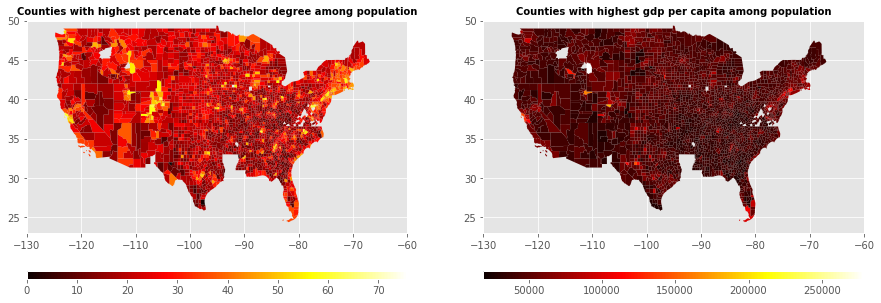

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
grouped.plot(ax=ax1,column='bachelor_degree_percentage_2015_2019',cmap='hot',legend=True,legend_kwds={'orientation':'horizontal','pad':0.1,'aspect':50})
ax1.set_title('Counties with highest percenate of bachelor degree among population',fontweight='bold',size=10)
ax1.set_xlim(-130,-60)
ax1.set_ylim(23,50)

grouped.plot(ax=ax2,column='per_capita_personal_income_2019',cmap='hot',legend=True,legend_kwds={'orientation':'horizontal','pad':0.1,'aspect':50})
ax2.set_title('Counties with highest gdp per capita among population',fontweight='bold',size=10)
ax2.set_xlim(-130,-60)
ax2.set_ylim(23,50)

plt.show()

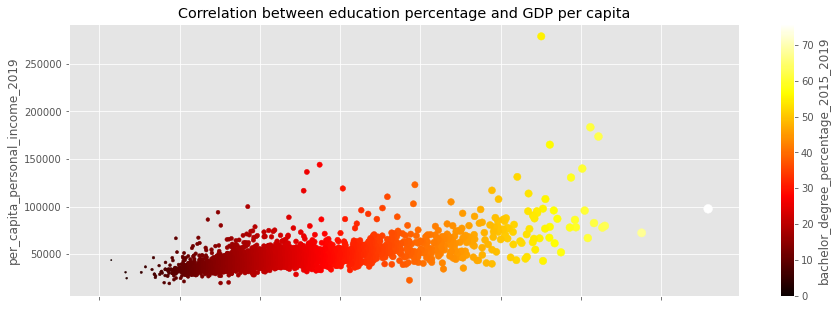

Coefficeint of Correlation between percentage of educated population and GDP per capita for US counties is 0.65


In [12]:
df.plot(figsize=(15,5),kind='scatter',x='bachelor_degree_percentage_2015_2019',y='per_capita_personal_income_2019',
        c='bachelor_degree_percentage_2015_2019',s='bachelor_degree_percentage_2015_2019',cmap='hot',alpha=1)
plt.title('Correlation between education percentage and GDP per capita')
plt.show()

corr=df['bachelor_degree_percentage_2015_2019'].corr(df['per_capita_personal_income_2019'])
print(f'Coefficeint of Correlation between percentage of educated population and GDP per capita for US counties is {round(corr,2)}')

In [13]:
grouped.columns

Index(['county_FIPS', 'state', 'county', 'per_capita_personal_income_2019',
       'per_capita_personal_income_2020', 'per_capita_personal_income_2021',
       'associate_degree_numbers_2016_2020',
       'bachelor_degree_numbers_2016_2020',
       'associate_degree_percentage_2016_2020',
       'bachelor_degree_percentage_2015_2019', 'GEOID', 'geometry'],
      dtype='object')

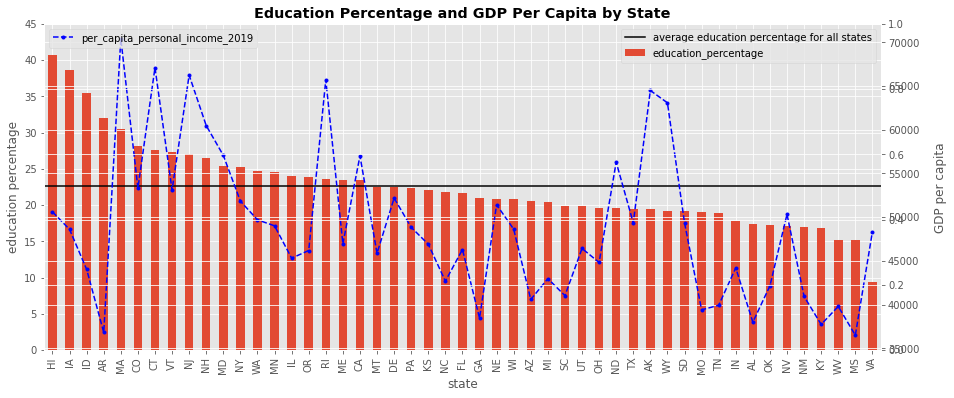

In [14]:
grouped=df.groupby('state').agg({'bachelor_degree_numbers_2016_2020':'sum','per_capita_personal_income_2019':'mean'}).reset_index()
grouped=grouped.merge(iso[['Code','April 1, 2020']],left_on='state',right_on='Code')
grouped['education_percentage']=(100*grouped['bachelor_degree_numbers_2016_2020']/grouped['April 1, 2020'])
grouped=grouped.sort_values('education_percentage',ascending=False)

ax=grouped.plot(figsize=(15,6),kind='bar',x='state',y='education_percentage')
grouped.plot(ax=ax.twinx(),kind='line',x='state',y='per_capita_personal_income_2019',ls='--',marker='.',color='blue')
ax.axhline(grouped['education_percentage'].mean(),color='k',label='average education percentage for all states')
plt.legend(loc='upper left')
ax.legend()
ax.set_ylim(0,45)
ax.set_title('Education Percentage and GDP Per Capita by State',fontweight='bold')
ax.set_ylabel('education percentage')
ax.twinx().set_ylabel('GDP per capita',labelpad=30)
plt.show()

In [15]:
# AK and WY has higher education level than the US average and most of the states, but they lag behind in terms of GDP per capita.
# on the contrary, HI,IA,ID and AR have lower education percentage then some other US states, but they are leading in terms of GDP per capita